#### Librerías

In [1]:
# Manipulación de datos
import os
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#### Carga de datos

Los archivos csv se encuentran distribuidos en diferentes carpetas. Además, cada carpeta lleva el nombre de la plataforma pero los todos los archivos csv están como "titles"

In [2]:
directory = r'C:\Users\DELL\OneDrive\GITHUB - Repositorios\Datasets\Movies and Shows'
df_variables = []

for dirpath, dirname, filename in os.walk(directory, topdown = True):
   if len(filename) != 0:
       var_name = dirpath.split('\\')[-1].replace(' ','_')
       value = pd.read_csv(filepath_or_buffer = os.path.join(dirpath,filename[1]))
       value['origin'] = var_name
       globals()[var_name] = value
       df_variables.append(var_name)
print('Variables creadas: ',df_variables)

Variables creadas:  ['Amazon', 'Apple_TV', 'Disney', 'HBO_Max', 'NETFLIX', 'Paramount']


Los datos obtenidos deben concatenarse, entonces un buena práctica es verificar el nivel de similitud de las variables entre cada archivo cargado. Luego, se procederá con la concatenación de todos los archivos.

In [3]:
# Crear una lista que contenga listas
aux = []
for i in df_variables:
    aux.append(globals()[i].columns.tolist())    


# Comparación de los elementos en la lista
if all(set(i) == set(aux[0]) for i in aux):
    print("Columnas idénticas")
else:
    print("Columnas diferentes")
    
# Agregar una columna 
# Concatenación
df = pd.concat(objs = [globals()[i] for i in df_variables], axis = 0, join = 'outer', ignore_index = True)

Columnas idénticas


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25246 entries, 0 to 25245
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25246 non-null  object 
 1   title                 25246 non-null  object 
 2   type                  25246 non-null  object 
 3   description           25050 non-null  object 
 4   release_year          25246 non-null  int64  
 5   age_certification     12097 non-null  object 
 6   runtime               25246 non-null  int64  
 7   genres                25246 non-null  object 
 8   production_countries  25246 non-null  object 
 9   seasons               5791 non-null   float64
 10  imdb_id               23260 non-null  object 
 11  imdb_score            22646 non-null  float64
 12  imdb_votes            22586 non-null  float64
 13  tmdb_popularity       24519 non-null  float64
 14  tmdb_score            22109 non-null  float64
 15  origin             

#### 3. Limpieza de datos

##### Copia de trabajo

In [5]:
df2 = df.copy()

##### Verificación de valores faltantes

**1. ¿Existen valores faltantes?**

In [39]:
# Valores faltantes
#df2.isnull().sum().any()
df2.isna().sum().sort_values(ascending = False)

seasons                 19455
age_certification       13149
tmdb_score               3137
imdb_votes               2660
imdb_score               2600
imdb_id                  1986
tmdb_popularity           727
description               196
id                          0
title                       0
type                        0
release_year                0
runtime                     0
genres                      0
production_countries        0
origin                      0
dtype: int64

**2. ¿Por qué existen tantos valores faltantes en la columna seasons?** <br/>
Son películas, estos casos no llevan temporadas

In [32]:
df2.loc[df2['seasons'].isna(),'type'].value_counts()

MOVIE    19455
Name: type, dtype: int64

**3. ¿Qué hay de los valores faltantes en las otras columnas?**<br/>
Se asume que los valores faltantes no son causa de un error de registro, solamente marcan la carencia de información

removed_columns = []

df2.columns

In [42]:
df2.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,origin
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261,Amazon
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357,Amazon
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433,Amazon
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600,Amazon
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400,Amazon


In [44]:
df2.loc[df2['imdb_id'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,origin
43,tm119274,The Outlaw,MOVIE,Newly appointed sheriff Pat Garrett is pleased...,1943,NaN,116,['western'],['US'],NaN,NaN,NaN,NaN,9.658,5.500,Amazon
187,tm16906,San Pietro,MOVIE,This documentary movie is about the battle of ...,1945,NaN,38,"['war', 'documentation']",['US'],NaN,NaN,NaN,NaN,4.270,6.200,Amazon
349,tm57795,The Stolen Jools,MOVIE,Famous actress Norma Shearer's jewels are stol...,1931,NaN,20,['comedy'],['US'],NaN,NaN,NaN,NaN,2.516,5.500,Amazon
428,tm96331,La Cucaracha,MOVIE,"Señor Martinez, a famous theater owner, visits...",1934,NaN,20,"['music', 'comedy']",['US'],NaN,NaN,NaN,NaN,1.821,5.100,Amazon
655,tm15681,Why We Fight: War Comes to America,MOVIE,The seventh and final film of Frank Capra's Wh...,1945,NaN,70,"['documentation', 'war']",['US'],NaN,NaN,NaN,NaN,1.122,6.893,Amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25055,tm1307793,A Whole Lifetime with Jamie Demetriou,MOVIE,A womb with a view. Awkward adulthood. The not...,2023,NaN,52,['comedy'],['GB'],NaN,NaN,NaN,NaN,10.065,6.700,NETFLIX
25057,tm1301942,Copenhagen Cowboy: Nightcall with Nicolas Wind...,MOVIE,Show creator Nicolas Winding Refn and his team...,2023,R,27,['documentation'],[],NaN,NaN,NaN,NaN,4.081,5.000,NETFLIX
25062,tm1312425,Have a Nice Day!,MOVIE,A retired radio host bags groceries to earn mo...,2023,NaN,93,"['drama', 'comedy']",['MX'],NaN,NaN,NaN,NaN,27.135,6.000,NETFLIX
25071,tm1303784,عبود في البيت,MOVIE,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",['KW'],NaN,NaN,NaN,NaN,3.351,2.000,NETFLIX


**Pregunta 2. ¿Cuál es la distribución de la temporadas en los shows?** <br/>

In [11]:
df2.loc[df2['seasons'] == df2['seasons'].max()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1799,ts29459,Shark Week,SHOW,"The Discovery Channel's Shark Week, first broa...",1987,TV-14,44,['documentation'],['US'],53.0,tt1146333,7.8,382.0,13.518,7.318
16090,ts22243,Sesame Street,SHOW,"On a special inner city street, the inhabitant...",1969,TV-Y,51,"['comedy', 'animation', 'family', 'fantasy', '...",['US'],53.0,tt0299380,8.1,14391.0,123.513,7.008


In [75]:
# Alternativa 1
# aux = [i for i in range(2,12,2)]
# df2['seasons'].value_counts(bins = aux)


# Alternativa 2
aux = [i for i in range(0,12,2)]
#aux_2 = [i for i in aux] 
aux.append(np.inf)
print(aux)
#intervals = pd.cut(df2['seasons'], bins = [np.NINF,5,10,15,np.inf], right = True)
intervals = pd.cut(df2['seasons'], bins = aux, right = True).value_counts()
intervals

# Gráfico
#sns.catplot(data = intervals.reset_index(),
#            x = 'index', y = 'seasons', kind = 'bar',
#            height = 4, aspect = 2)
#plt.show()

[0, 2, 4, 6, 8, 10, inf]


(0.0, 2.0]     4049
(2.0, 4.0]      976
(4.0, 6.0]      385
(6.0, 8.0]      158
(10.0, inf]     149
(8.0, 10.0]      74
Name: seasons, dtype: int64

In [59]:
intervals.reset_index()

,index,seasons
0,"(0, 2]",4049
1,"(2, 4]",976
2,"(4, 6]",385
3,"(6, 8]",158
4,"(8, 10]",74


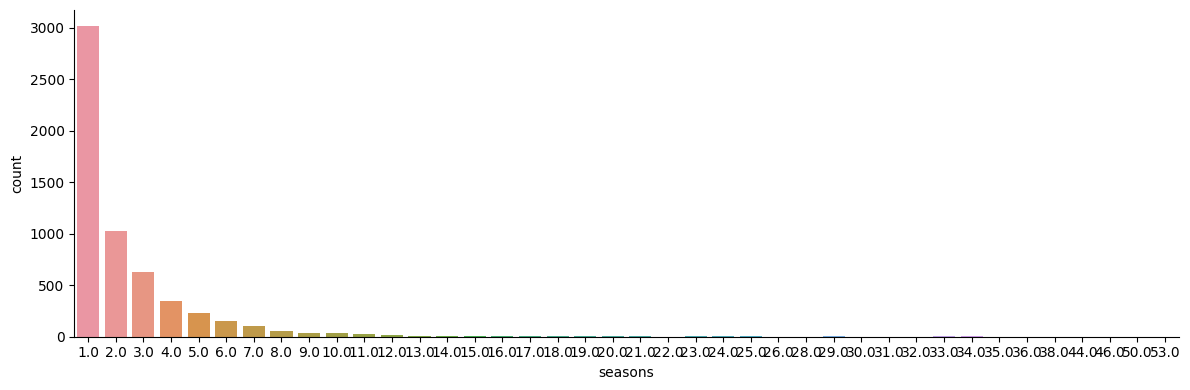

In [61]:
sns.catplot(data = df2, x = 'seasons',
            kind = 'count', height= 4, aspect = 3)
plt.show()

In [ ]:
# Hay 21487 id de películas con 1 aparición en el dataset
# Hay 1851 id de películas con 2 apariciones en el dataset
# Hay 19 id de películas con 3 apariciones en el dataset
df2['id'].value_counts().value_counts()

1    21487
2     1851
3       19
Name: id, dtype: int64

In [ ]:
aux = df2.iloc[:,0:8].drop_duplicates(keep = False)
aux[aux['id'].duplicated(keep = False)].sort_values(by = 'id', ascending = True)

,id,title,type,description,release_year,age_certification,runtime,genres
9385,tm460993,Clifford the Big Red Dog,MOVIE,As Emily struggles to fit in at home and at sc...,2021,PG,95,"['comedy', 'drama', 'family', 'fantasy', 'scif..."
13899,tm460993,Clifford the Big Red Dog,MOVIE,As Emily struggles to fit in at home and at sc...,2021,PG,95,"['comedy', 'family', 'fantasy', 'scifi', 'roma..."


In [ ]:
df2[df2.iloc[:,0:-1].duplicated(keep = False)].sort_values(by = ['id'], ascending = True).shape

(3749, 16)